## Regridding delta_precip and delta_SST to match ERA-20c grid

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import glob
import xesmf as xe

In [5]:
dlon, dlat = 10., 10.

ds_out = xr.Dataset({'lat': (['lat'], np.arange(-90.+dlat/2., 90., dlat)),
                     'lon': (['lon'], np.arange(0.+dlon/2., 360., dlon)),})

def regrid_to_common(ds, ds_out=ds_out, save_weights=False):
    """
    Regrid from rectilinear grid to common grid
    
    Bilinear and conservative should be the most commonly used methods. 
    They are both monotonic (i.e. will not create new maximum/minimum). 
    """
    regridder = xe.Regridder(ds, ds_out, 'bilinear', periodic=True, reuse_weights=save_weights)
    return regridder(ds)

In [3]:
delta_precip = xr.open_dataarray("delta_precip.nc").compute()

In [4]:
delta_precip_regridded = regrid_to_common(delta_precip)

/home/users/jwang28/miniconda3/envs/xesmf_env/lib/python3.10/site-packages/xarray/core/dataarray.py:856: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data


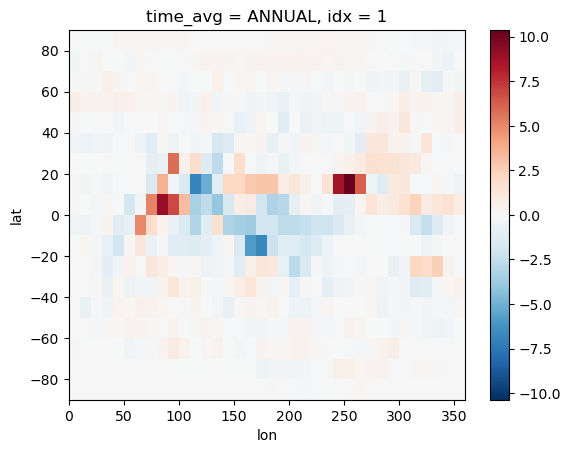

In [5]:
delta_precip_regridded.sel(idx=1, time_avg='ANNUAL').plot()

In [6]:
delta_precip_regridded.to_netcdf("delta_precip_10deg.nc")

In [3]:
observed =xr.open_dataset("/gws/nopw/j04/aopp/strat_clim_data/reanalysis/era20c/Precip1900-2010.nc")['tp']
observed_mean = observed.rename({'latitude':'lat', 'longitude':'lon'}).resample(time='1Y').mean('time').compute()

In [6]:
observed_mean_regridded = regrid_to_common(observed_mean)

/home/users/jwang28/miniconda3/envs/xesmf_env/lib/python3.10/site-packages/xarray/core/dataarray.py:856: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data


In [8]:
observed_mean_regridded.to_netcdf("observed_mean_annual.nc")